# 用户指南，第七章：和弦
[原文链接](https://web.mit.edu/music21/doc/usersGuide/usersGuide_07_chords.html#usersguide-07-chords)

和弦`Chord`是包含多个`Pitch`的对象，位于`music21.chord`模块中。创建和弦最简单通用的方法是输入音高列表：

In [1]:
from music21 import *
cMinor = chord.Chord(["C4","G4","E-5"])

`Note`和`Chord`都是`GeneralNote`的子类，所以它们有许多共通的属性，例如时值：

In [2]:
cMinor.duration.type = 'half'
cMinor.quarterLength

2.0

但是由于`Chord`包含多个音高，它没有`.pitch`属性

In [3]:
cMinor.pitch

AttributeError: 'Chord' object has no attribute 'pitch'

而是拥有`.pitches`属性。它是和弦中各音高对象所组成的元组

In [4]:
cMinor.pitches

(<music21.pitch.Pitch C4>, <music21.pitch.Pitch G4>, <music21.pitch.Pitch E-5>)

关于python多提一句，`.pitches`是元组。元组是什么？它就像列表一样，但使用圆括号而不是方括号来创建。

In [5]:
baroqueTuple = ('Strozzi', 'Bach', 'Handel', 'Telemann')
classicalList = ['Mozart', 'Haydn', 'Saint-George', 'Beethoven']

baroqueTuple

('Strozzi', 'Bach', 'Handel', 'Telemann')

In [6]:
classicalList

['Mozart', 'Haydn', 'Saint-George', 'Beethoven']

元组和列表都可以用方括号来索引

In [7]:
baroqueTuple[0]

'Strozzi'

In [8]:
classicalList[0]

'Mozart'

元组和列表最大的区别在于：列表可以修改。使用`.append`向列表中添加元素，使用`.remove`删除元素

In [9]:
classicalList.append('Ella Fitzgerald') # she's a classic to me...

classicalList

['Mozart', 'Haydn', 'Saint-George', 'Beethoven', 'Ella Fitzgerald']

In [10]:
classicalList.remove('Mozart')

classicalList

['Haydn', 'Saint-George', 'Beethoven', 'Ella Fitzgerald']

但是元组不能修改

In [11]:
baroqueTuple.append('Miles Davis')

AttributeError: 'tuple' object has no attribute 'append'

`.pitch`返回的是元组，因为单独改变和弦中的音高是模糊的（ambiguous）：到底是只改变`.pitch`的返回值，还是也改变和弦自身？在`music21`中，凡是对结果进行编辑会造成难题或bug的地方都会返回元组。当然，你可以手动将它转换成列表：

In [12]:
baroqueList = list(baroqueTuple)
baroqueList.append('Miles Davis')
baroqueList

['Strozzi', 'Bach', 'Handel', 'Telemann', 'Miles Davis']

In [13]:
classicalTuple = tuple(classicalList)
classicalTuple

('Haydn', 'Saint-George', 'Beethoven', 'Ella Fitzgerald')

回到我们刚才的和弦：

In [14]:
cMinor.pitches

(<music21.pitch.Pitch C4>, <music21.pitch.Pitch G4>, <music21.pitch.Pitch E-5>)

你创建和弦时，既然已经知道了它所包含的音高，那么你还能做什么呢？

判断是大和弦还是小和弦：

In [15]:
cMinor.isMajorTriad()

False

In [16]:
cMinor.isMinorTriad()

True

判断是否为转位：

In [ ]:
cMinor.inversion()

原位和弦的`.inversion()`为0，考虑以下这个和弦：

In [17]:
cMajor = chord.Chord(["E3","C4","G4"])
cMajor.inversion()

1

对这个和弦来说，另外两个函数很重要：

In [18]:
cMajor.root()

<music21.pitch.Pitch C4>

In [19]:
cMajor.bass()

<music21.pitch.Pitch E3>

可以用`.third`和`.fifth`获取该和弦的三级音和五级音。注意这两个是智能属性而不是函数，不需要括号。这是我们开发`music21`中出现的一个错误，将会改正：

In [20]:
cMajor.third

<music21.pitch.Pitch E3>

In [21]:
cMajor.fifth

<music21.pitch.Pitch G4>

还有一个`.seventh`属性，获取和弦的七级音，但是在这里做不了什么事情

In [22]:
cMajor.seventh

返回的结果是`None`

In [23]:
cMajor.seventh is None

True

可以向和弦中加入或删除音高，就像Python集合一样：

In [24]:
dMaj = chord.Chord('D4 F#4')
dMaj.add('A5')
dMaj

<music21.chord.Chord D4 F#4 A5>

In [25]:
dMaj.remove('D4')
dMaj

<music21.chord.Chord F#4 A5>

In [26]:
dMaj.add(pitch.Pitch('D3'))
dMaj.add(note.Note('F#5'))
dMaj

<music21.chord.Chord D3 F#4 F#5 A5>

## 显示和弦

可以像music21中的其他对象一样，用`show`显示和弦

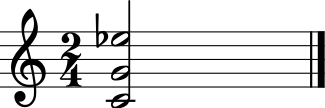

In [27]:
cMinor.show()

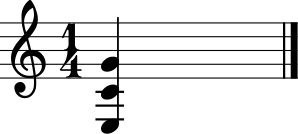

In [28]:
cMajor.show()

这些和弦看起来太占地方了，用`closedPosition()`把它们缩紧

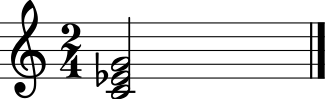

In [29]:
cClosed = cMinor.closedPosition()
cClosed.show()

注意原来的`cMinor`没有变。只有`cClosed`是缩紧的和弦

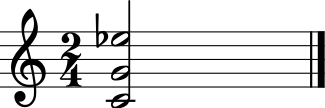

In [30]:
cMinor.show()

如果要原位修改和弦，就要使用`.closedPosition(inPlace=True)`，这会改变和弦对象本身。由于函数的结果赋给了和弦对象本身，我们不需要把它赋给另一个变量名：

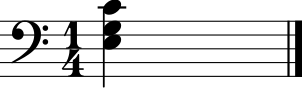

In [31]:
cMajor.closedPosition(inPlace=True)
cMajor.show()

除此之外还有一个函数`.semiClosedPosition()`，它很像`.closedPosition()`，但是如果位置上已经有一个音高占用了，就会向上移动一个八度。该方法可以尽量紧密地显示复杂的，后调性的（post tonal）和弦：

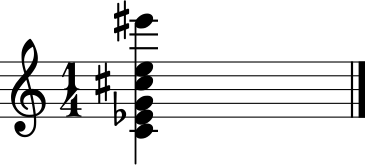

In [32]:
c1 = chord.Chord(['C4', 'E5', 'C#6', 'E-7', 'G8', 'C9', 'E#9'])
c2 = c1.semiClosedPosition()
c2.show()

用`.commonName`获取和弦的名称

In [33]:
cn1 = cMinor.commonName
print(cn1)

minor triad


In [34]:
print(cMajor.commonName)

major triad


复杂的和弦拥有不常见的`commonName`。：例如这个美国作曲家Elliott Carter喜欢的和弦：

In [35]:
elliottCarterChord = chord.Chord(['C4','D-4','E4','F#4'])
elliottCarterChord.commonName

'all-interval tetrachord'

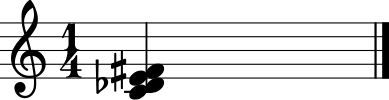

In [36]:
elliottCarterChord.show()

## 创建和弦的其他方法；和弦与Stream
有其他方法创建和弦。一种方法是用音符列表：

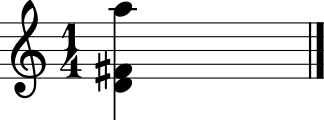

In [37]:
d = note.Note('D4')
fSharp = note.Note('F#4')
a = note.Note('A5')
dMajor = chord.Chord([d, fSharp, a])

dMajor.show()

或者空格分开的音名：

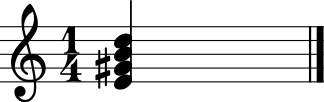

In [38]:
e7 = chord.Chord("E4 G#4 B4 D5")
e7.show()

可以不带八度号：

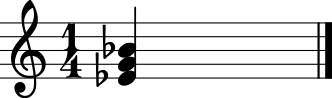

In [39]:
es = chord.Chord("E- G B-")
es.show()

但是如果和弦跨越了两个八度间的边界（B和C之间），除非你喜欢转位和弦，否则这不是你想要的：

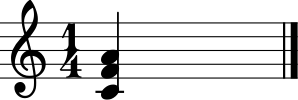

In [40]:
fMajor = chord.Chord("F A C")
fMajor.show()

注意因为C排在F和A前面，这个和弦是第二转位和弦（又叫做四六和弦）。可以用以下方法获取：

In [41]:
print(fMajor.inversion(), fMajor.inversionName())

2 64


除`.commonName`以外，还有几个其他的“名称”智能属性：

In [42]:
fMajor.fullName

'Chord {F | A | C} Quarter'

In [43]:
fMajor.pitchedCommonName

'F-major triad'

如同音符`Note`一样，和弦`Chord`也可以存入`Stream`：

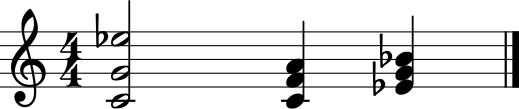

In [44]:
stream1 = stream.Stream()
stream1.append(cMinor)
stream1.append(fMajor)
stream1.append(es)
stream1.show()

`Note`、`Rest`、`Chord`可以共处一个`Stream`下：

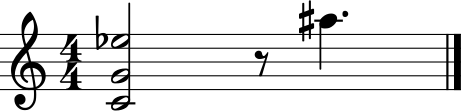

In [45]:
rest1 = note.Rest()
rest1.quarterLength = 0.5
noteASharp = note.Note('A#5')
noteASharp.quarterLength = 1.5

stream2 = stream.Stream()
stream2.append(cMinor)
stream2.append(rest1)
stream2.append(noteASharp)
stream2.show()

# 后调性（post-tonal）和弦（简要）
TODO

In [46]:
cMinor.intervalVector

[0, 0, 1, 1, 1, 0]

In [47]:
cMajor.intervalVector

[0, 0, 1, 1, 1, 0]

In [48]:
elliottCarterChord.intervalVector

[1, 1, 1, 1, 1, 1]

In [49]:
elliottCarterChord.hasZRelation

True

In [50]:
otherECChord = elliottCarterChord.getZRelation()
otherECChord

<music21.chord.Chord C D- E- G>

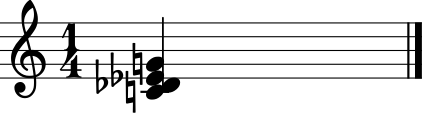

In [51]:
otherECChord.show()

In [52]:
otherECChord.intervalVector

[1, 1, 1, 1, 1, 1]

In [53]:
print(elliottCarterChord.primeForm)

[0, 1, 4, 6]


In [54]:
print(elliottCarterChord.normalOrder)

[0, 1, 4, 6]


In [55]:
print(elliottCarterChord.forteClass)

4-15A


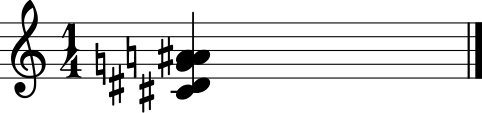

In [56]:
oddChord = chord.Chord([1, 3, 7, 9, 10])
oddChord.show()

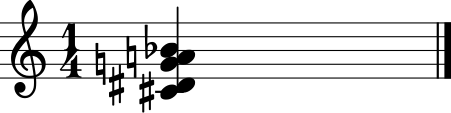

In [57]:
oddChord.pitches[-1].getHigherEnharmonic(inPlace=True)
oddChord.show()

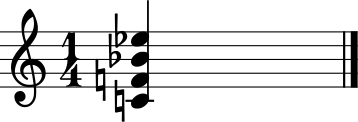

In [58]:
midiChordType = chord.Chord([60, 65, 70, 75])
midiChordType.show()